In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline #jupyter Notebook-specific command that makes Matplotlib plots appear directly inside the notebook
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

UsageError: unrecognized arguments: #jupyter Notebook-specific command that makes Matplotlib plots appear directly inside the notebook


In [6]:
data_df = pd.read_csv("heart.csv") 
data_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
#Checking For A NULL Values in dataset
null_counts = data_df.isnull().sum()
print(null_counts)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [12]:
data_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [14]:
df = data_df

In [16]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Specify the target columns for label encoding
target_columns = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]

# Apply label encoding to each target column
for column in target_columns:
    df[column] = encoder.fit_transform(df[column])

In [18]:
# Define the threshold values
threshold_value = 300

mean_cholesterol = df["Cholesterol"].mean()

# Identify the outliers in the "cholesterol" column
outliers = df[(df["Cholesterol"] > threshold_value)]

# Replace the outlier values with the mean
df.loc[outliers.index, "Cholesterol"] = mean_cholesterol

C:\Users\agrim\AppData\Local\Temp\ipykernel_15472\1334576318.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '198.7995642701525' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outliers.index, "Cholesterol"] = mean_cholesterol


In [20]:
# Remove rows with cholesterol = 0
df = df[df["Cholesterol"] != 0]
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289.0,0,1,172,0,0.0,2,0
1,49,0,2,160,180.0,0,1,156,0,1.0,1,1
2,37,1,1,130,283.0,0,2,98,0,0.0,2,0
3,48,0,0,138,214.0,0,1,108,1,1.5,1,1
4,54,1,2,150,195.0,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264.0,0,1,132,0,1.2,1,1
914,68,1,0,144,193.0,1,1,141,0,3.4,1,1
915,57,1,0,130,131.0,0,1,115,1,1.2,1,1
916,57,0,1,130,236.0,0,0,174,0,0.0,1,1


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix , classification_report
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [24]:
!pip install xgboost
from xgboost import XGBClassifier

In [25]:
x = df.drop('HeartDisease',axis=1)
y = df[['HeartDisease']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
y_train=y_train.values.ravel()

In [28]:
model_scores = pd.DataFrame(columns = ['model','train_score','test_score'])

In [30]:
lr = LogisticRegression(C=1,max_iter=2000)
lr.fit(x_train, y_train)

LogisticRegression(C=1, max_iter=2000)

In [32]:
lr.score(x_train,y_train)

0.8438485804416404

In [34]:
lr.score(x_test,y_test)

0.8392857142857143

In [36]:
model_scores.loc[len(model_scores)] = ['Linear regression',lr.score(x_train,y_train),lr.score(x_test,y_test)]

In [38]:
ada=AdaBoostClassifier(n_estimators=6,learning_rate=0.4)

In [40]:
ada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.4, n_estimators=6)

In [42]:
ada.score(x_train,y_train)

0.8454258675078864

In [44]:
ada.score(x_test,y_test)

0.8392857142857143

In [46]:
model_scores.loc[len(model_scores)] = ['AdaBoost',ada.score(x_train,y_train),ada.score(x_test,y_test)]

In [48]:
xgb=XGBClassifier(n_estimators=10,max_depth=5, learning_rate=0.2)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [50]:

xgb.score(x_train,y_train)

0.9337539432176656

In [52]:
xgb.score(x_test,y_test)

0.9196428571428571

In [54]:
model_scores.loc[len(model_scores)] = ['XGBClassifier',xgb.score(x_train,y_train),xgb.score(x_test,y_test)]

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 9)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [58]:
knn.score(x_train,y_train)

0.7413249211356467

In [60]:
knn.score(x_test,y_test)

0.6160714285714286

In [62]:
model_scores.loc[len(model_scores)] = ['KNeighborsClassifier',knn.score(x_train,y_train),knn.score(x_test,y_test)]

In [64]:
rf=RandomForestClassifier()

In [79]:
param_grid = {
    'n_estimators': [5, 10,15,20,25],
    'max_depth': [5, 7, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 6],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 7, 10, 20, 30],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 10, 15, 20, 25]},
             verbose=2)

In [81]:
grid_search.score(x_train,y_train)
grid_search

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 7, 10, 20, 30],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 10, 15, 20, 25]},
             verbose=2)

In [83]:
rand=RandomForestClassifier(max_depth=15,n_estimators=12)

In [85]:
rand.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, n_estimators=12)

In [93]:
rand.score(x_train,y_train)

0.9889589905362776

In [95]:
rand.score(x_test,y_test)

0.8571428571428571

In [89]:
model_scores.loc[len(model_scores)] = ['RandomForestClassifier',rand.score(x_train,y_train),rand.score(x_test,y_test)]

In [91]:
model_scores

,model,train_score,test_score
0,Linear regression,0.843849,0.839286
1,AdaBoost,0.845426,0.839286
2,XGBClassifier,0.933754,0.919643
3,KNeighborsClassifier,0.741325,0.616071
4,RandomForestClassifier,0.988959,0.857143


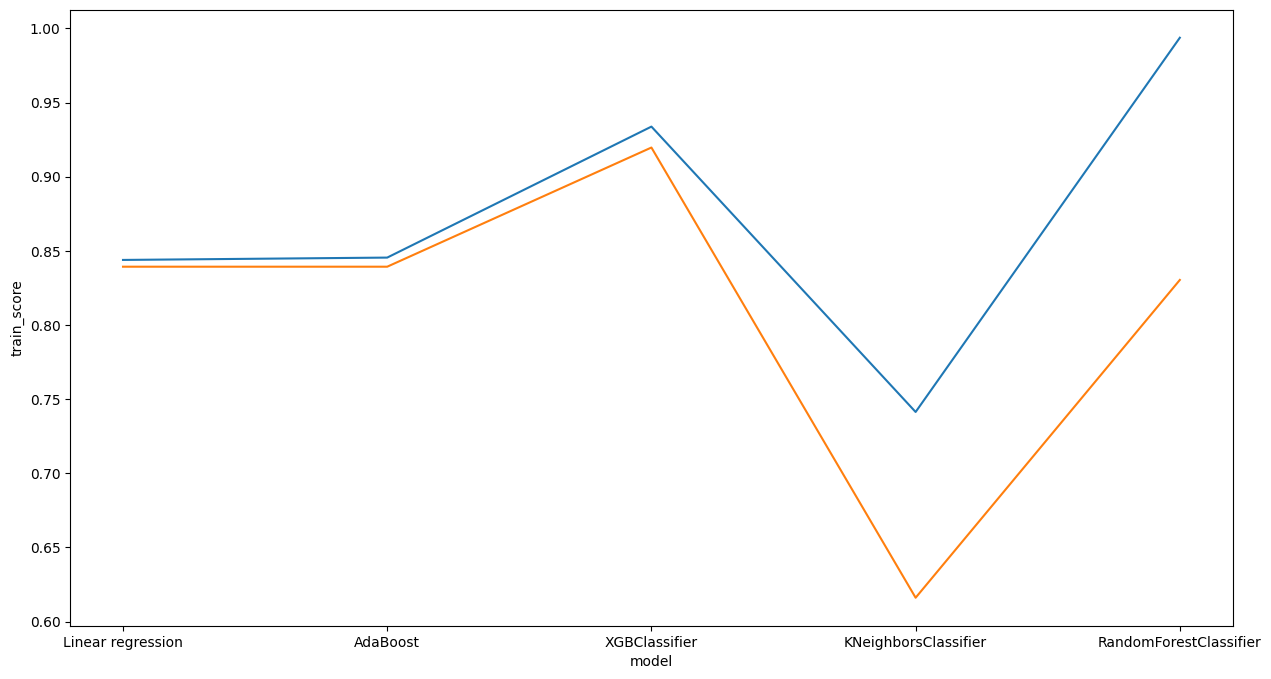

In [41]:
plt.figure(figsize = (15,8))
sns.lineplot(data=model_scores, x="model", y="train_score")
sns.lineplot(data=model_scores, x="model", y="test_score")

plt.show()

<Axes: >

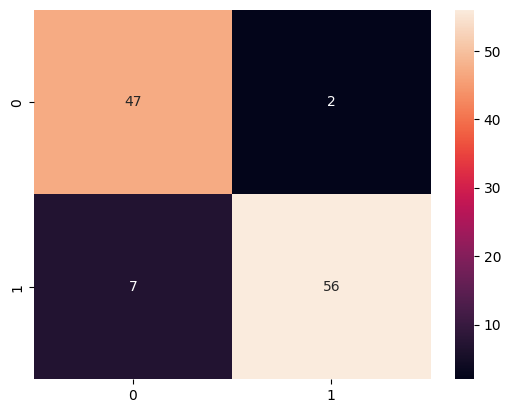

In [42]:
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,xgb.predict(x_test)), annot=True)

In [43]:
print(classification_report(y_test,xgb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        49
           1       0.97      0.89      0.93        63

    accuracy                           0.92       112
   macro avg       0.92      0.92      0.92       112
weighted avg       0.92      0.92      0.92       112



In [154]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinking
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'subsample': [0.8, 1.0],  # Fraction of samples used per tree
    'colsample_bytree': [0.8, 1.0],  # Fraction of features used per tree
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV to the data
grid_search.fit(x_train, y_train)

# Print the best score on the training set
print("Best score on training data:", grid_search.score(x_train, y_train))

# To see the results of the grid search
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best score on training data: 0.9384858044164038
Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best cross-validation score:  0.8754030746156729
